# Ejercicios Práctica 3
## Pablo Olivares

In [1]:
import sympy as sp
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
from tabulate import tabulate

*NOTA*: Antes de comenzar, me gustaría aclarar que en varios casos distintos métodos llevarán a la misma fórmula para el PVI. Por tanto, sus errores serán los mismos. Por otro lado, por lo visto teoría sabemos que todos los métodos de Euler y sus modificaciones, de Taylor y de Runge-Kutta explícitos son estables. Por tanto, todos los métodos en los que se exige el estudio de la estabilidad del método (que son de un tipo de los mencionados) está garantizada.

### Métodos de Euler

**Nota importante:** en caso de necesitar una sóla iteración (o el valor $y_1$) del método que fuera entonces convendría adaptar los algoritmos anteriores, así como todos los que vienen a continuación, para que por ejemplo introducidos `(f,a,ya,b,N)` tan sólo calculen y devuelvan `Y[1]` o directamente `y1`, con el corespondiente ahorro de tiempo de cómputo. Ver ejemplo a continuación.

**1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.**

Comenzaremos importando los métodos previamente definidos:

In [2]:
import eulerimplicito
import eulerexplicito
import eulerimplicitoaprox

Declaramos las condiciones iniciales, variables y la función:

In [3]:
N = [10, 30, 50]
a, b = 0, 1
ya = 1
eulerExpl, eulerImpl, eulerImplAprox = [], [], []
t, y0, z = sp.symbols('t, y_0,  z')

def f(t,z):
    return z

Ahora declararé la función a evaluar y su solución exacta obtenida a través de NumPy:

In [4]:
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)
edo_sol = sp.dsolve(edo)
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_sol = sp.solve(CI_eq)
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
y_x = sp.lambdify(t, sol_exacta, 'numpy')
xx = np.linspace(a,b,100)

A continuación, ejecutaremos cada uno de los métodos de forma que $N$ y $h$ proporcionen distintos niveles de precisión, estabilidad y coste. En mi caso, lo haré para $N_0 = 0$, $N_1 = 100$ y $N_2 = 1000$. $h$ es el incremento de la variable independiente y como estamos realizando particiones uniformes a partir de $N$, no es necesario declararlo explícitamente.

Primero compararé los resultados del mismo método con distinto $N$:

In [5]:
for i in range(len(N)):
    eulerExpl.append({'xx': eulerexplicito.integrate(f,a,ya,b,N[i])[0], 'yy': eulerexplicito.integrate(f,a,ya,b,N[i])[1]})
    eulerImpl.append({'xx': eulerimplicito.integrate(f,a,ya,b,N[i])[0], 'yy': eulerimplicito.integrate(f,a,ya,b,N[i])[1]})
    eulerImplAprox.append({'xx': eulerimplicitoaprox.integrate(f,a,ya,b,N[i])[0], 'yy': eulerimplicitoaprox.integrate(f,a,ya,b,N[i])[1]})

Veamos la comparación en un gráfico y sus perturbaciones:

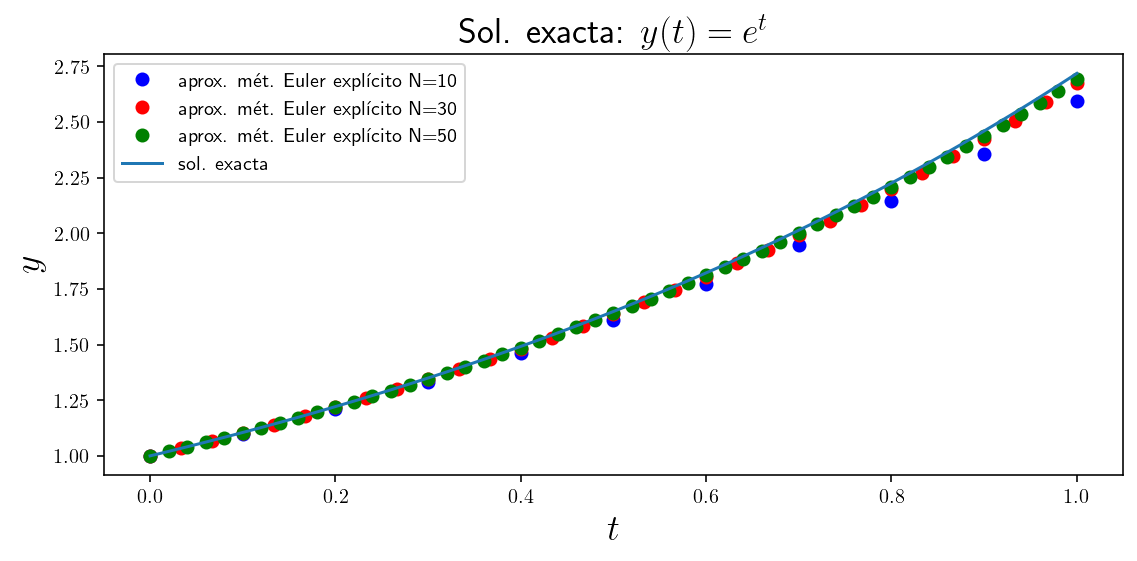

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(eulerExpl[0]['xx'],eulerExpl[0]['yy'], 'bo',label = "aprox. mét. Euler explícito N=10")
ax.plot(eulerExpl[1]['xx'],eulerExpl[1]['yy'], 'ro',label = "aprox. mét. Euler explícito N=30")
ax.plot(eulerExpl[2]['xx'],eulerExpl[2]['yy'], 'go',label = "aprox. mét. Euler explícito N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Como se puede apreciar, cuanto mayor sea el número de particiones, mejor es la aproximación. Esto ocurre igual si lo probamos con los otros métodos. Sim embargo, cuanto mayor es $N$, más tarda el programa en ejecutar, pues el coste computacional es mayor *(esto lo veremos más adelante)*.

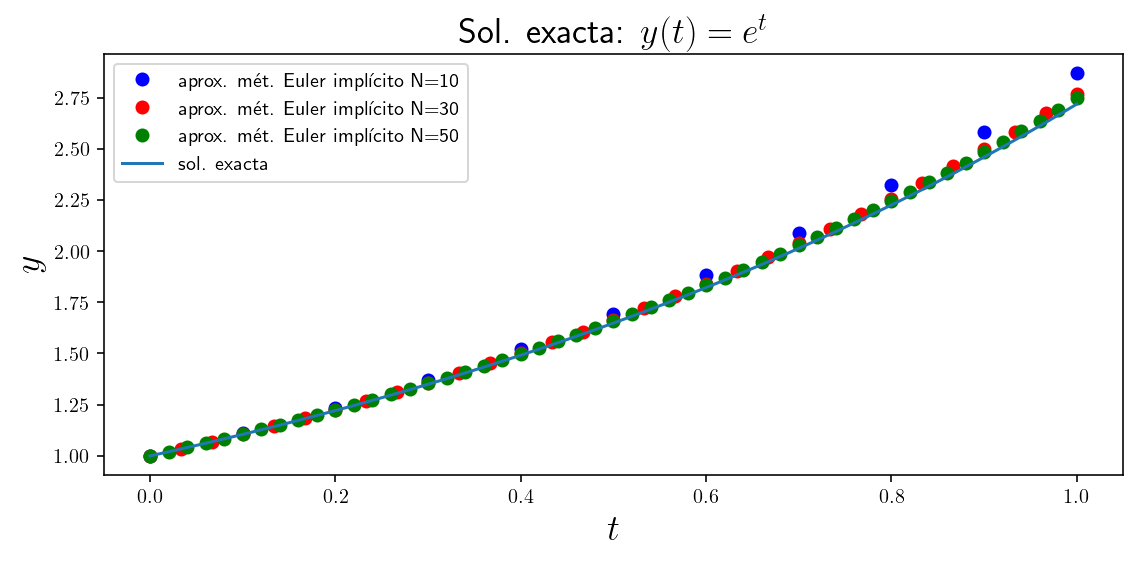

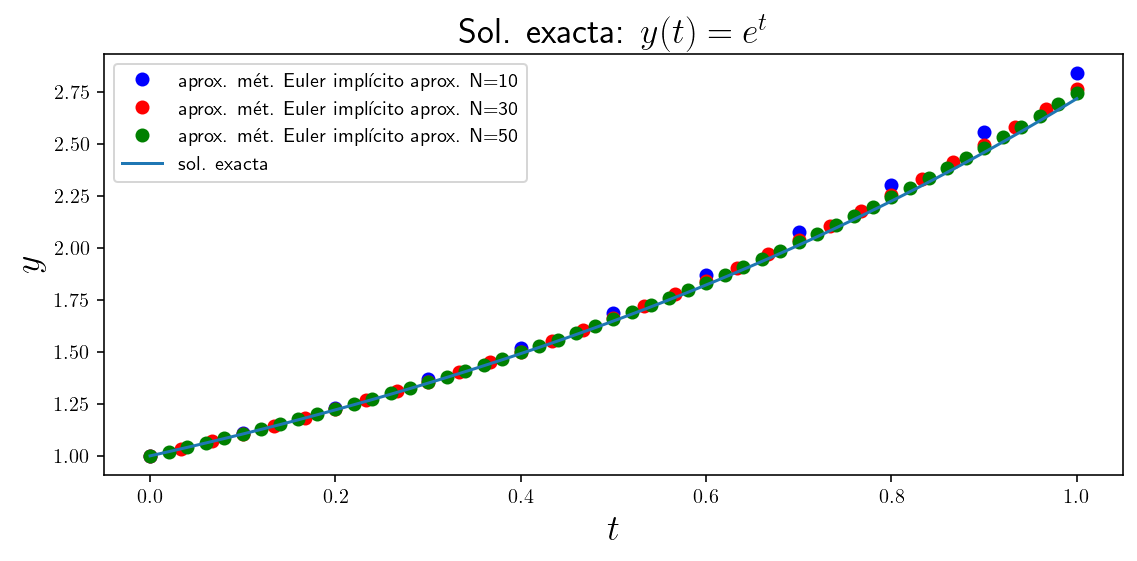

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(eulerImpl[0]['xx'],eulerImpl[0]['yy'], 'bo',label = "aprox. mét. Euler implícito N=10")
ax.plot(eulerImpl[1]['xx'],eulerImpl[1]['yy'], 'ro',label = "aprox. mét. Euler implícito N=30")
ax.plot(eulerImpl[2]['xx'],eulerImpl[2]['yy'], 'go',label = "aprox. mét. Euler implícito N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_EulerImpl = fig

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(eulerImplAprox[0]['xx'],eulerImplAprox[0]['yy'], 'bo',label = "aprox. mét. Euler implícito aprox. N=10")
ax.plot(eulerImplAprox[1]['xx'],eulerImplAprox[1]['yy'], 'ro',label = "aprox. mét. Euler implícito aprox. N=30")
ax.plot(eulerImplAprox[2]['xx'],eulerImplAprox[2]['yy'], 'go',label = "aprox. mét. Euler implícito aprox. N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_EulerExplAprox = fig

Comparemos ahora los distintos métodos con el mismo $N$:

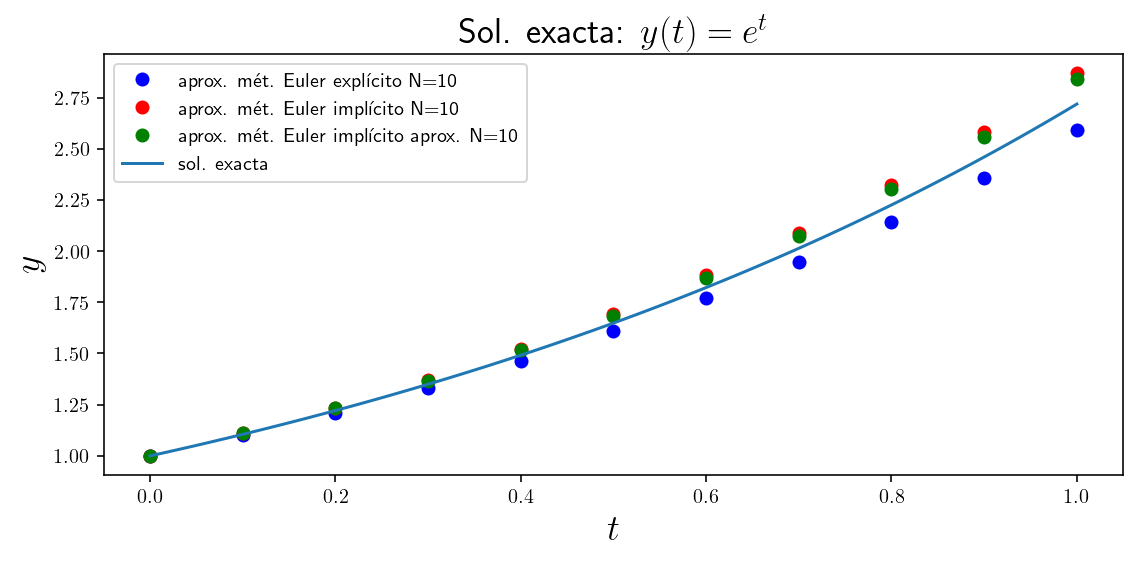

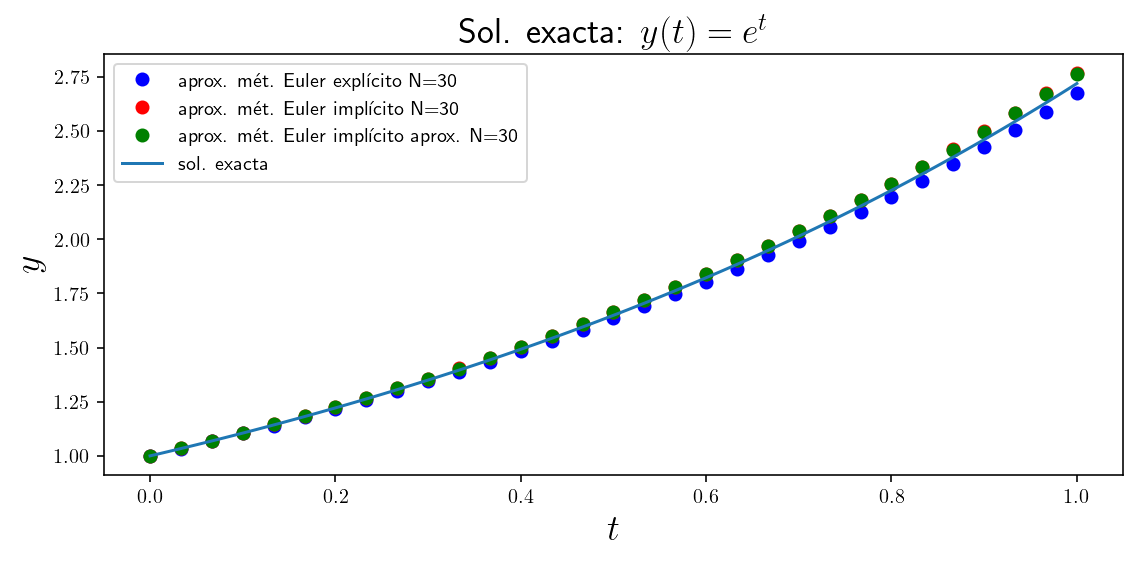

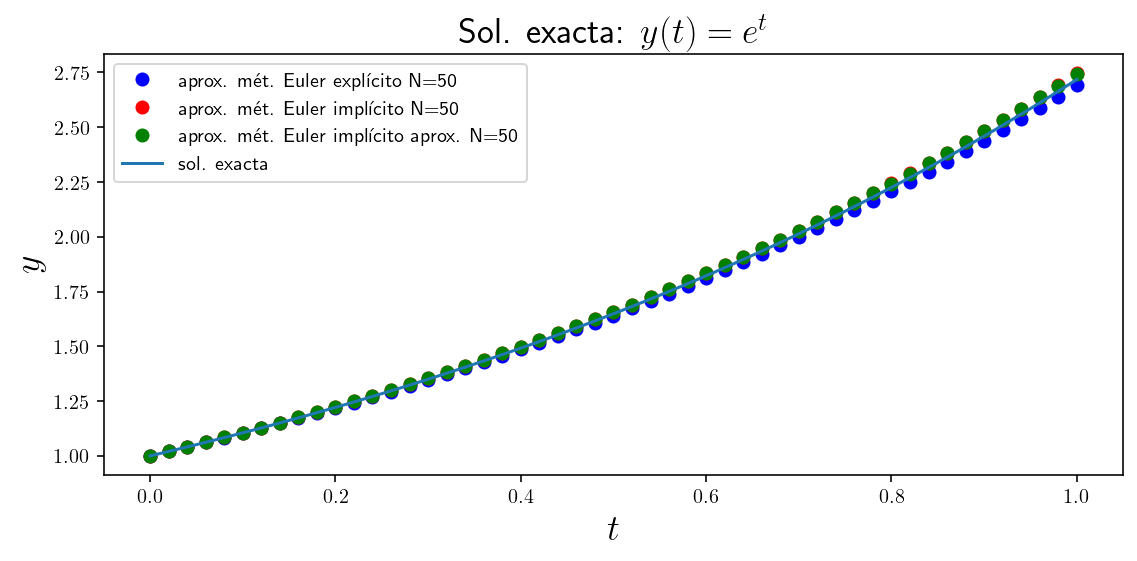

In [8]:
for i in range(len(N)): 
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(eulerExpl[i]['xx'],eulerExpl[i]['yy'], 'bo',label = "aprox. mét. Euler explícito N={}".format(N[i]))
    ax.plot(eulerImpl[i]['xx'],eulerImpl[i]['yy'], 'ro',label = "aprox. mét. Euler implícito N={}".format(N[i]))
    ax.plot(eulerImplAprox[i]['xx'],eulerImplAprox[i]['yy'], 'go',label = "aprox. mét. Euler implícito aprox. N={}".format(N[i]))
    ax.plot(xx, y_x(xx), label="sol. exacta")
    ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.legend()
    fig.tight_layout()
    fig

Por tanto, visualmente podemos percibir que el método explícito aproximado es el mejor para aproximar esta función $y(t)$. Comprobémoslo viendo los errores:

In [9]:
errorEulerExpl, errorEulerImpl, errorEulerImplAprox = ['Error Euler explícito'], ['Error Euler implícito'], ['Error Euler implícito aprox.']

for i in range(len(N)):
    errorEulerExpl.append(max(abs(eulerExpl[i]['yy']-y_x(eulerExpl[i]['xx']))))
    errorEulerImpl.append(max(abs(eulerImpl[i]['yy']-y_x(eulerImpl[i]['xx']))))
    errorEulerImplAprox.append(max(abs(eulerImplAprox[i]['yy']-y_x(eulerImplAprox[i]['xx']))))

index = ['Errores', 'N=10', 'N=30', 'N=50']
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox], headers=index))

Errores                           N=10       N=30       N=50
----------------------------  --------  ---------  ---------
Error Euler explícito         0.124539  0.0439631  0.0266938
Error Euler implícito         0.14969   0.0467345  0.0276909
Error Euler implícito aprox.  0.121139  0.0436639  0.0265927


Como se puede apreciar, el error disminuye de manera considerable cuanto mayor es el número de particiones. También podemos observar que el método de Euler explícito es un poco mejor que el implícito.

Por último en este ejercicio, veamos el tiempo que tarda en ejecutar cada comando la CPU y así poder comparar el coste computacional.

In [10]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N[0])

54.9 µs ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%%timeit
eulerimplicito.integrate(f,a,ya,b,N[0])

187 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
eulerimplicitoaprox.integrate(f,a,ya,b,N[0])

61.6 µs ± 4.87 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Comprobando la ejecución para $N=10$, se ve claramente que el método explícito es el que tiene menor coste computacional. Veamos ahora para $N=30$:

In [13]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N[1])

72.9 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%%timeit
eulerimplicito.integrate(f,a,ya,b,N[1])

935 ms ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
eulerimplicitoaprox.integrate(f,a,ya,b,N[1])

73.8 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Finalmente observamos que cuanto mayor sea el número de particiones, mayor es el coste. Esto es principalmente debido por el aumento de operaciones y la complejidad de estas a la hora de realizarlas. Aquí se nota sobre todo en el método implícito, donde se debe resolver una ecuación por cada iteración del bucle de $N$ iteraciones.

**2. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).**


In [16]:
%%file eulermejorado.py
## módulo euler
''' método de Euler del punto medio para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N; h2 = h/2
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+h2,Y[n]+h2*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Overwriting eulermejorado.py


In [17]:
%%file eulerheun.py
## módulo euler
''' método de Euler-Heun para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N; h2 = h/2
    for n in range(N):
        Y.append(Y[n] + h2*(F(X[n],Y[n]) + F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Overwriting eulerheun.py


In [18]:
import eulermejorado
import eulerheun

Repitiendo la estrategia del anterior ejercicio:

In [19]:
eulerMejorado, eulerHeun = [], []
errorEulerMejorado, errorEulerHeun = ['Error Euler mejorado'], ['Error Euler-Heun']

for i in range(len(N)):
    eulerMejorado.append({'xx': eulermejorado.integrate(f,a,ya,b,N[i])[0], 'yy': eulermejorado.integrate(f,a,ya,b,N[i])[1]})
    eulerHeun.append({'xx': eulerheun.integrate(f,a,ya,b,N[i])[0], 'yy': eulerheun.integrate(f,a,ya,b,N[i])[1]})
    errorEulerMejorado.append(max(abs(eulerMejorado[i]['yy']-y_x(eulerMejorado[i]['xx']))))
    errorEulerHeun.append(max(abs(eulerHeun[i]['yy']-y_x(eulerHeun[i]['xx']))))

En este caso directamente compararemos los métodos entre sí:

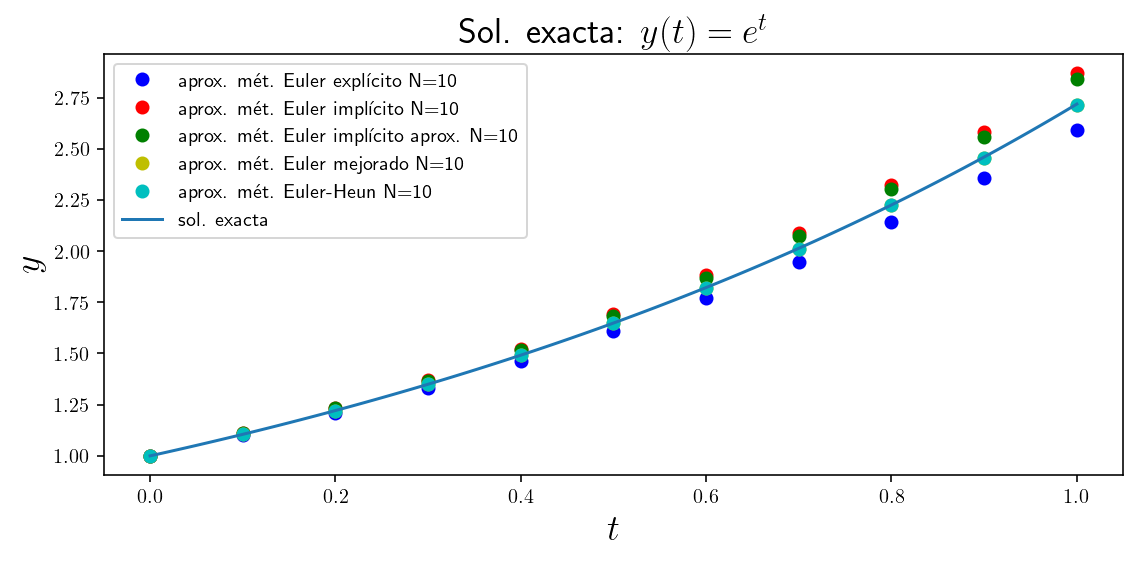

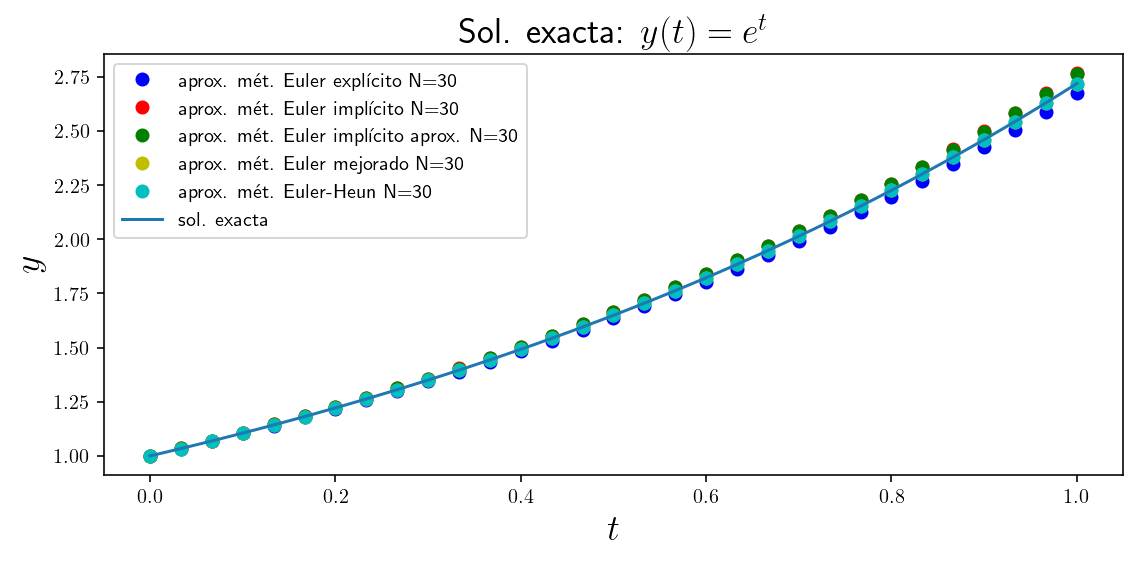

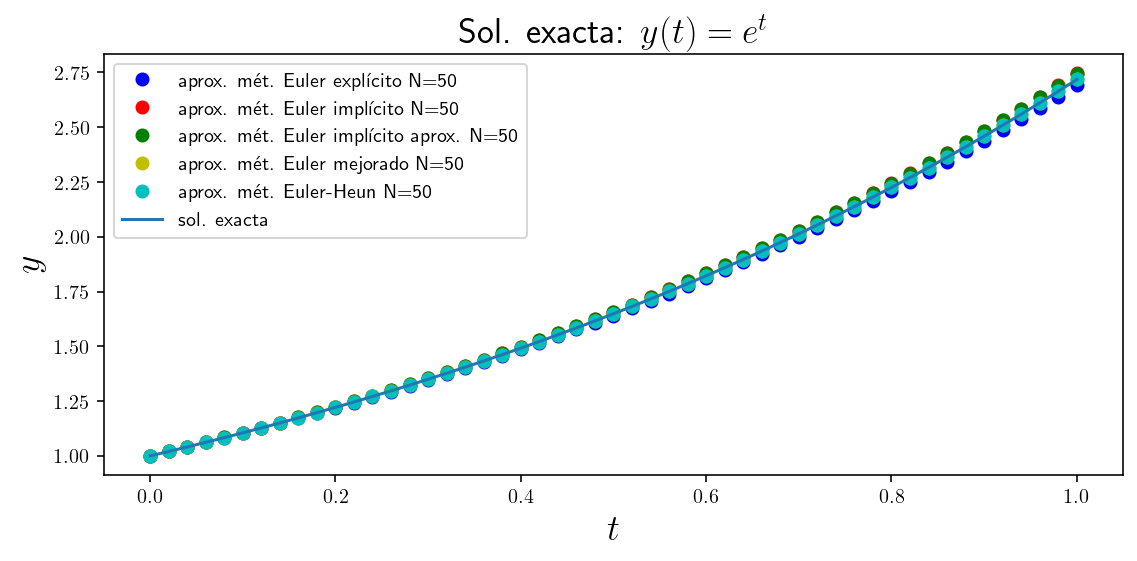

In [20]:
for i in range(len(N)): 
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(eulerExpl[i]['xx'],eulerExpl[i]['yy'], 'bo',label = "aprox. mét. Euler explícito N={}".format(N[i]))
    ax.plot(eulerImpl[i]['xx'],eulerImpl[i]['yy'], 'ro',label = "aprox. mét. Euler implícito N={}".format(N[i]))
    ax.plot(eulerImplAprox[i]['xx'],eulerImplAprox[i]['yy'], 'go',label = "aprox. mét. Euler implícito aprox. N={}".format(N[i]))
    ax.plot(eulerMejorado[i]['xx'],eulerMejorado[i]['yy'], 'yo',label = "aprox. mét. Euler mejorado N={}".format(N[i]))
    ax.plot(eulerHeun[i]['xx'],eulerHeun[i]['yy'], 'co',label = "aprox. mét. Euler-Heun N={}".format(N[i]))
    ax.plot(xx, y_x(xx), label="sol. exacta")
    ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.legend()
    fig.tight_layout()
    fig

In [21]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorEulerHeun], headers=index))

Errores                             N=10         N=30         N=50
----------------------------  ----------  -----------  -----------
Error Euler explícito         0.124539    0.0439631    0.0266938
Error Euler implícito         0.14969     0.0467345    0.0276909
Error Euler implícito aprox.  0.121139    0.0436639    0.0265927
Error Euler mejorado          0.00420098  0.000490924  0.000178516
Error Euler-Heun              0.00420098  0.000490924  0.000178516


In [22]:
%%timeit
eulermejorado.integrate(f,a,ya,b,N[1])

77.4 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [23]:
%%timeit
eulerheun.integrate(f,a,ya,b,N[1])

89.2 µs ± 6.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Como podemos observar, estos dos métodos podemos considerarlos bastante mejores que los anteriores. No sólo reducen considerablemente el error si no que también el tiempo de ejecución es bastante cercano al método explícito.

### Métodos de Taylor

**1. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.**

Para seguir con las comparaciones respecto a los anteriores ejercicios, usaremos los mismos valores de $N$.

In [24]:
import Taylor2

In [25]:
taylor2 = []
errorTaylor2 = ['Error Taylor p=2']

for i in range(len(N)):
    taylor2.append({'xx': Taylor2.integrate(f,a,ya,b,N[i])[0], 'yy': Taylor2.integrate(f,a,ya,b,N[i])[1]})
    errorTaylor2.append(max(abs(taylor2[i]['yy']-y_x(taylor2[i]['xx']))))

Para evitar cargar mucho la gráfica, lo compararé visualmente con los métodos del ejercicio anterior.

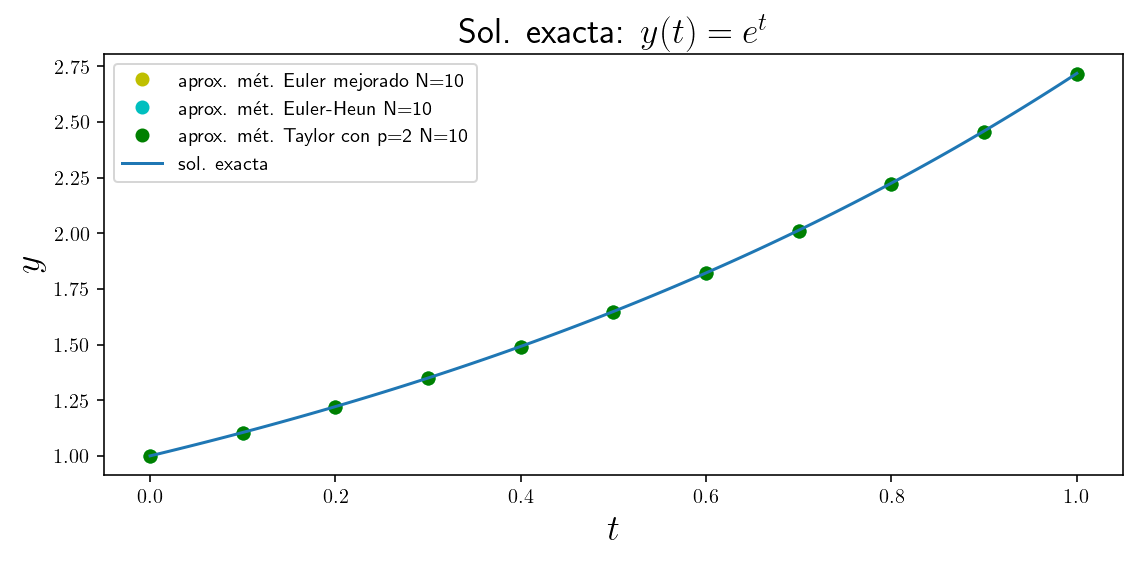

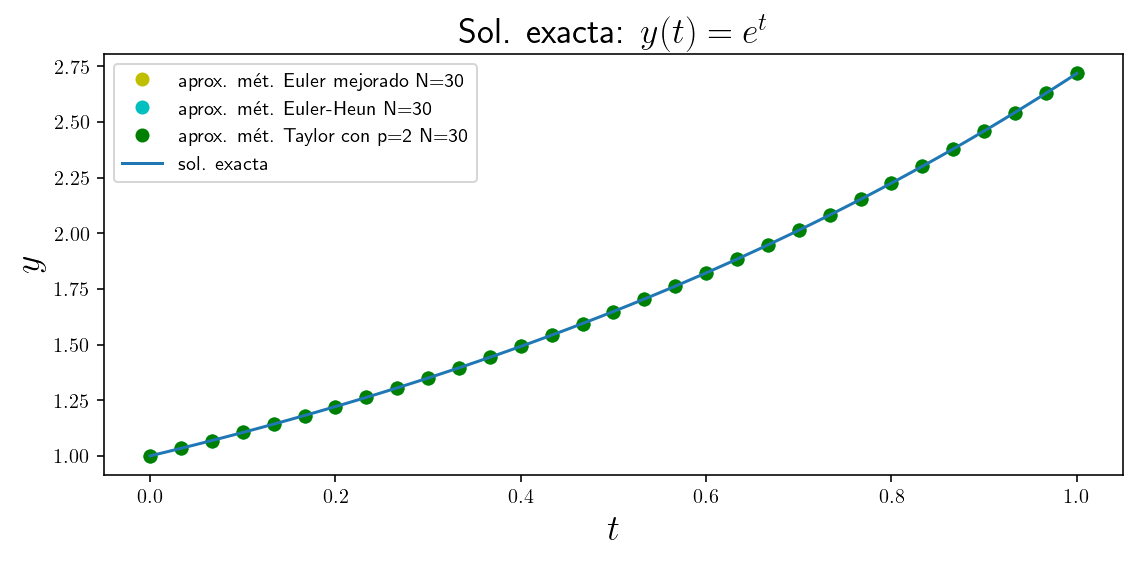

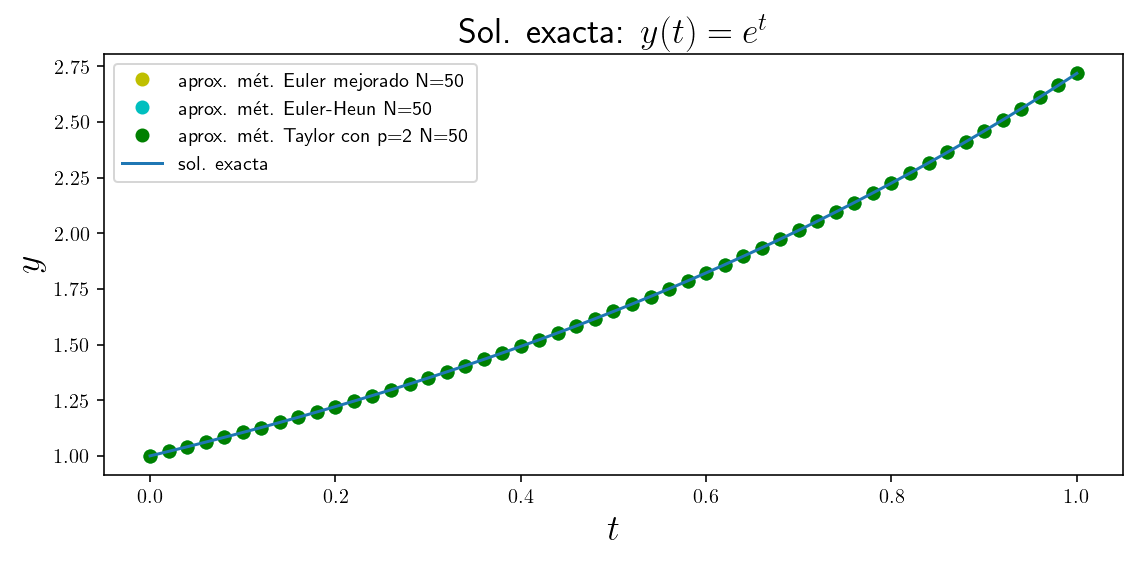

In [26]:
for i in range(len(N)): 
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(eulerMejorado[i]['xx'],eulerMejorado[i]['yy'], 'yo',label = "aprox. mét. Euler mejorado N={}".format(N[i]))
    ax.plot(eulerHeun[i]['xx'],eulerHeun[i]['yy'], 'co',label = "aprox. mét. Euler-Heun N={}".format(N[i]))
    ax.plot(taylor2[i]['xx'],taylor2[i]['yy'], 'go',label = "aprox. mét. Taylor con p=2 N={}".format(N[i]))
    ax.plot(xx, y_x(xx), label="sol. exacta")
    ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.legend()
    fig.tight_layout()
    fig

In [27]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorEulerHeun, errorTaylor2], headers=index))

Errores                             N=10         N=30         N=50
----------------------------  ----------  -----------  -----------
Error Euler explícito         0.124539    0.0439631    0.0266938
Error Euler implícito         0.14969     0.0467345    0.0276909
Error Euler implícito aprox.  0.121139    0.0436639    0.0265927
Error Euler mejorado          0.00420098  0.000490924  0.000178516
Error Euler-Heun              0.00420098  0.000490924  0.000178516
Error Taylor p=2              0.00420098  0.000490924  0.000178516


In [28]:
%%timeit
Taylor2.integrate(f,a,ya,b,N[1])

18.3 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Como podemos ver, el método de Taylor con $p=2$ da muy buenos resultados. De hecho, el error máximo producido es muy bajo además de igual al método de Euler mejorado y al de Euler-Heun. Sin embargo, el aumento de orden conlleva un gran coste computacional, viendo que pasa del orden de los microsegundos al de los milisegundos debido al cálculo de derivadas.

**2. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.**

Para ello, obtengamos dicha modificación. Tan sólo es necesario aumentar en uno el grado del polinomio de Taylor obtenido en `Taylor2`. Para ello deberemos calcular $F_3(t,y(t))$:
$$y(t+h)\approx y(t)+h\, y'(t)+\frac{h^2}{2}\, y''(t)+\frac{h^3}{3!}\, y^{3)}(t)\\ \equiv y(t)+h\, F_1(t,y(t))+\frac{h^2}{2}\, F_2(t,y(t))+\frac{h^3}{3!}\, F_3(t,y(t))$$
donde
$$F_3(t,z)\equiv \frac{dF_2}{dt}(t,z)+\frac{dF_2}{dz}(t,z)\,F_1(t,z)$$

In [29]:
%%file Taylor3.py
## módulo Taylor3
''' método del método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+h**3/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)


Overwriting Taylor3.py


In [30]:
import Taylor3

Ahora compararemos el error y tiempo de ejecución respecto a `Taylor2`:

In [31]:
taylor3, errorTaylor3 = [], ['Error Taylor p=3']
for i in range(len(N)):
    taylor3.append({'xx': Taylor3.integrate(f,a,ya,b,N[i])[0], 'yy': Taylor3.integrate(f,a,ya,b,N[i])[1]})
    errorTaylor3.append(max(abs(taylor3[i]['yy']-y_x(taylor3[i]['xx']))))
    
print(tabulate([errorTaylor2, errorTaylor3], headers=index))

Errores                  N=10         N=30         N=50
----------------  -----------  -----------  -----------
Error Taylor p=2  0.00420098   0.000490924  0.000178516
Error Taylor p=3  0.000104566  4.08455e-06  8.91716e-07


In [32]:
%%timeit
Taylor3.integrate(f,a,ya,b,N[1])

50.5 ms ± 8.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


De nuevo, vemos que el Taylor de orden $p=3$ da errores todavía más pequeños que Taylor de orden $p=2$ a cambio de un mayor coste computacional.

### Métodos de Runge-Kutta

**1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.**

In [33]:
import RK4

In [34]:
rk4 = []
errorRK4 = ['Error Runge-Kutta de orden 4']

for i in range(len(N)):
    rk4.append({'xx': RK4.integrate(f,a,ya,b,N[i])[0], 'yy': RK4.integrate(f,a,ya,b,N[i])[1]})
    errorRK4.append(max(abs(rk4[i]['yy']-y_x(rk4[i]['xx']))))

In [35]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorEulerHeun, errorTaylor2, errorTaylor3, errorRK4], headers=index))

Errores                              N=10         N=30         N=50
----------------------------  -----------  -----------  -----------
Error Euler explícito         0.124539     0.0439631    0.0266938
Error Euler implícito         0.14969      0.0467345    0.0276909
Error Euler implícito aprox.  0.121139     0.0436639    0.0265927
Error Euler mejorado          0.00420098   0.000490924  0.000178516
Error Euler-Heun              0.00420098   0.000490924  0.000178516
Error Taylor p=2              0.00420098   0.000490924  0.000178516
Error Taylor p=3              0.000104566  4.08455e-06  8.91716e-07
Error Runge-Kutta de orden 4  2.08432e-06  2.72e-08     3.56449e-09


In [36]:
%%timeit
RK4.integrate(f,a,ya,b,N[1])

107 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**2. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.**

Lo primero que haré será añadir el método de Runge-Kutta explícito a partir del arreglo de Butcher proporcionado:

In [37]:
%%file ERK.py
## módulo ERK
''' Método de Runge-Kutta explícito para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,h).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    butcher = arreglo de butcher
'''
import numpy as np
def integrate(F,x0,y0,xfinal,butcher,N):
    a,b,c = [], [], []

    for k in butcher:
        c.append(k[0])
        a.append(k[1])
        b.append(k[2])
    
    def RK(F,xn,yn,h):
        K = []
        for i in range(len(butcher)):
            s = 0
            for j in range(i):
                s += a[i][j]*K[j]
            K.append(F(xn+c[i]*h,yn+h*s))
        
        return sum(b[i]*K[i] for i in range(len(butcher)))
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

Overwriting ERK.py


In [38]:
import ERK

Una vez definido, comprobemos primero que está correctamente implementado. Para ello, compararemos los arreglos de butcher para RK4 explícito y para RK2 del Punto medio y Heun con los previamente implementados y veamos que coinciden:

In [39]:
butcherRK4expl = [[0,[0,0,0,0],1/6],[1/2,[1/2,0,0,0],2/6],[1/2,[0,1/2,0,0],2/6],[1,[0,0,1,0],1/6]]
butcherRK2ptoMedio = [[0,[0,0],0],[1/2,[1/2,0],1]]
butcherRK2Ralston = [[0,[0,0],1/4],[2/3,[2/3,0],3/4]]

In [40]:
rk4Butcher, rk2ptoMedioButcher = [], []
errorRK4Butcher, errorRK2ptoMedioButcher = ['Error Runge-Kutta de orden 4 Butcher'], ['Error Runge-Kutta de orden 2 Euler mejorado Butcher']


for i in range(len(N)):
    rk4Butcher.append({'xx': ERK.integrate(f,a,ya,b,butcherRK4expl,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherRK4expl,N[i])[1]})
    rk2ptoMedioButcher.append({'xx': ERK.integrate(f,a,ya,b,butcherRK2ptoMedio,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherRK2ptoMedio,N[i])[1]})
    errorRK4Butcher.append(max(abs(rk4Butcher[i]['yy']-y_x(rk4Butcher[i]['xx']))))
    errorRK2ptoMedioButcher.append(max(abs(rk2ptoMedioButcher[i]['yy']-y_x(rk2ptoMedioButcher[i]['xx']))))

Realicemos las comparaciones:

In [41]:
print('Diferencia entre el método de Runge-Kutta de orden 4 explícito y el método de Runge-Kutta explicito con arreglo de Butcher:', max(abs(rk4Butcher[i]['yy']-rk4[i]['yy'])))
print('Diferencia entre el método de Runge-Kutta de orden 2 con pto medio y el método de Euler Mejorado explicito con arreglo de Butcher:', max(abs(rk2ptoMedioButcher[i]['yy']-eulerMejorado[i]['yy'])))

Diferencia entre el método de Runge-Kutta de orden 4 explícito y el método de Runge-Kutta explicito con arreglo de Butcher: 8.881784197001252e-16
Diferencia entre el método de Runge-Kutta de orden 2 con pto medio y el método de Euler Mejorado explicito con arreglo de Butcher: 0.0


Como podemos ver, la diferencia en los resultados de ambos métodos es mínima, incluso del orden de las cifras de precisión del número en Python, por lo que podemos asumir que son la misma. Por último, ontendremos la aproximación a partir del método implementado el método de Ralston, donde la elección de $\alpha$ y $\beta$ para $RK$ de orden 2 es óptima:

In [42]:
rk2ButcherRalston = []
errorRK2ButcherRalston = ['Error Runge-Kutta de orden 2 Butcher Ralston']

for i in range(len(N)):
    rk2ButcherRalston.append({'xx': ERK.integrate(f,a,ya,b,butcherRK2Ralston,N[i])[0], 'yy': ERK.integrate(f,a,ya,b,butcherRK2Ralston,N[i])[1]})
    errorRK2ButcherRalston.append(max(abs(rk2ButcherRalston[i]['yy']-y_x(rk2ButcherRalston[i]['xx']))))

In [43]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorRK2ptoMedioButcher, 
      errorEulerHeun, errorTaylor2, errorTaylor3, errorRK4, errorRK4Butcher, errorRK2ButcherRalston], headers=index))

Errores                                                     N=10         N=30         N=50
---------------------------------------------------  -----------  -----------  -----------
Error Euler explícito                                0.124539     0.0439631    0.0266938
Error Euler implícito                                0.14969      0.0467345    0.0276909
Error Euler implícito aprox.                         0.121139     0.0436639    0.0265927
Error Euler mejorado                                 0.00420098   0.000490924  0.000178516
Error Runge-Kutta de orden 2 Euler mejorado Butcher  0.00420098   0.000490924  0.000178516
Error Euler-Heun                                     0.00420098   0.000490924  0.000178516
Error Taylor p=2                                     0.00420098   0.000490924  0.000178516
Error Taylor p=3                                     0.000104566  4.08455e-06  8.91716e-07
Error Runge-Kutta de orden 4                         2.08432e-06  2.72e-08     3.56449e-09
Error

### Métodos MML

**1. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.**

In [44]:
%%file adamsMoulton2.py
## módulo AM2
''' Método de Adams-Moulton (con k = 2) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp
    
    def AM2(F,x0,y0,y1,y2,h):
        return 5/12*F(x0+2*h, y2) + 2/3*F(x0+h, y1) - 1/12*F(x0,y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    y2 = sp.Symbol('y2')
    for n in range(N-1):
        Y.append(sp.solve(Y[n+1]+h*AM2(F,X[n],Y[n],Y[n+1],y2,h)-y2,y2)[0])
    return np.array(X),np.array(Y)

Overwriting adamsMoulton2.py


In [45]:
%%file milneSimpson.py
## módulo MS2
''' Método de Milne-Simpson (q=2, m=0, r=0) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp

    def MS2(F,x0,y0,y1,y2,h):
        return (F(x0,y0)+4*F(x0+h,y1)+F(x0+2*h,y2))/3

    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    t = sp.Symbol('t')
    y1 = y0 + h*F(x0,y0); y2 = y1 + h*F(x0+h,y1)

    Y = [y0,y1]
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*MS2(F,X[n],Y[n],Y[n+1],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Overwriting milneSimpson.py


In [46]:
%%file nystrom.py
## módulo NYstrom
''' Método de Nystrom (q=2, m=0, r>=0) para r=1 y k=2 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):

    import numpy as np

    def Nys(F,x0,y1,h):
        return 2*F(x0+h,y1)
        
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/float(N)
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n] + h*Nys(F,X[n],Y[n+1],h))
    return np.array(X),np.array(Y)

Overwriting nystrom.py


In [47]:
%%file newtonCotes.py
## módulo NC (Trapecio)
''' Método de Newton-Cotes (q=k, m=r) para m=r=0 y k=1 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    import sympy as sp

    def NC(F,x0,y0,y1,h):
        return (F(x0,y0) + F(x0+h,y1))/2

    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    t = sp.Symbol('t')
    Y = [y0]
    for n in range(N):
        Y.append(sp.solve(Y[n]+h*NC(F,X[n],Y[n],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Overwriting newtonCotes.py


In [48]:
import adamsMoulton2
import milneSimpson
import nystrom
import newtonCotes

Ahora veamos el error de sus resultados:

In [49]:
adamsmoulton2, milnesimpson, nystromList, newtoncotes = [], [], [], []
errorAdamsMoulton2, errorMilneSimpson, errorNystrom, errorNewtonCotes = ['Error Adams-Moulton 2'],['Error Milne-Simpson'],['Error Nystrom'],['Error Newton-Cotes']

for i in range(len(N)):
    adamsmoulton2.append({'xx': adamsMoulton2.integrate(f,a,ya,b,N[i])[0], 'yy': adamsMoulton2.integrate(f,a,ya,b,N[i])[1]})
    milnesimpson.append({'xx': milneSimpson.integrate(f,a,ya,b,N[i])[0], 'yy': milneSimpson.integrate(f,a,ya,b,N[i])[1]})
    nystromList.append({'xx': nystrom.integrate(f,a,ya,b,N[i])[0], 'yy': nystrom.integrate(f,a,ya,b,N[i])[1]})
    newtoncotes.append({'xx': newtonCotes.integrate(f,a,ya,b,N[i])[0], 'yy': newtonCotes.integrate(f,a,ya,b,N[i])[1]})
    errorAdamsMoulton2.append(max(abs(adamsmoulton2[i]['yy']-y_x(adamsmoulton2[i]['xx']))))
    errorMilneSimpson.append(max(abs(milnesimpson[i]['yy']-y_x(milnesimpson[i]['xx']))))
    errorNystrom.append(max(abs(nystromList[i]['yy']-y_x(nystromList[i]['xx']))))
    errorNewtonCotes.append(max(abs(newtoncotes[i]['yy']-y_x(newtoncotes[i]['xx']))))

In [50]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorRK2ptoMedioButcher, 
      errorEulerHeun, errorTaylor2, errorTaylor3, errorRK4, errorRK4Butcher, errorRK2ButcherRalston, errorAdamsMoulton2, errorMilneSimpson, errorNystrom, errorNewtonCotes], headers=index))

Errores                                                     N=10         N=30         N=50
---------------------------------------------------  -----------  -----------  -----------
Error Euler explícito                                0.124539     0.0439631    0.0266938
Error Euler implícito                                0.14969      0.0467345    0.0276909
Error Euler implícito aprox.                         0.121139     0.0436639    0.0265927
Error Euler mejorado                                 0.00420098   0.000490924  0.000178516
Error Runge-Kutta de orden 2 Euler mejorado Butcher  0.00420098   0.000490924  0.000178516
Error Euler-Heun                                     0.00420098   0.000490924  0.000178516
Error Taylor p=2                                     0.00420098   0.000490924  0.000178516
Error Taylor p=3                                     0.000104566  4.08455e-06  8.91716e-07
Error Runge-Kutta de orden 4                         2.08432e-06  2.72e-08     3.56449e-09
Error

### Método Predictor-Corrector
**1. Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.**

In [51]:
%%file predictorcorrector.py
## módulo PC

''' Método predictor corrector de orden 5 para resolver
    el problema de valores iniciales {y}' = {F(x,{y})},
    donde {y} = {y[0],y[1],...y[N-1]}.
    X,Y = integrate(F,x0,y0,xfinal,N).
    x0,y0 = condiciones iniciales
    xfinal = valor final de x
    N = número de subintervalos de la partición
    h = incremento de x usado en la integración
    F = función suplida por el usuario que devuelve el
    array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

import numpy as np
import sympy as sp

def integrate(F,x0,y0,xfinal,N):

    #Metodo corrector
    def C(F,x0,y0,y1,y2,y3,y4,y5,h):
        return (251*F(x0+5*h,y5)+646*F(x0+4*h,y4)-264*F(x0+3*h,y3)+106*F(x0+2*h,y2)-19*F(x0+h,y1))/720

    #Metodo predictor
    def P(F,x0,y0,y1,y2,y3,y4,h):
        return (1901*F(x0+4*h,y4)-2774*F(x0+3*h,y3)+2616*F(x0+2*h,y2)-1274*F(x0+h,y1)+251*F(x0,y0))/720
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/float(N)

    # Semillas calculadas a partir del método de Euler Explícito 
    y1 = y0+h*F(x0,y0)
    y2 = y1+h*F(x0+h,y1)
    y3 = y2+h*F(x0+2*h,y2)
    y4 = y3+h*F(x0+3*h,y3)
    
    Y = [y0,y1,y2,y3,y4]
    for n in range(N-4):
        y5 = Y[n+4]+h*P(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],Y[n+4],h)
        Y.append(Y[n+4]+h*C(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],Y[n+4],y5,h))
    return np.array(X),np.array(Y)

Overwriting predictorcorrector.py


In [52]:
import predictorcorrector

In [53]:
PC = []
errorPC = ['Error Predictor-Corrector de orden 5']

for i in range(len(N)):
    PC.append({'xx': predictorcorrector.integrate(f,a,ya,b,N[i])[0], 'yy': predictorcorrector.integrate(f,a,ya,b,N[i])[1]})
    errorPC.append(max(abs(PC[i]['yy']-y_x(PC[i]['xx']))))

In [54]:
print(tabulate([errorEulerExpl, errorEulerImpl, errorEulerImplAprox, errorEulerMejorado, errorRK2ptoMedioButcher, 
      errorEulerHeun, errorTaylor2, errorTaylor3, errorRK4, errorRK4Butcher, errorRK2ButcherRalston, errorAdamsMoulton2, errorMilneSimpson, errorNystrom, errorNewtonCotes, errorPC], headers=index))

Errores                                                     N=10         N=30         N=50
---------------------------------------------------  -----------  -----------  -----------
Error Euler explícito                                0.124539     0.0439631    0.0266938
Error Euler implícito                                0.14969      0.0467345    0.0276909
Error Euler implícito aprox.                         0.121139     0.0436639    0.0265927
Error Euler mejorado                                 0.00420098   0.000490924  0.000178516
Error Runge-Kutta de orden 2 Euler mejorado Butcher  0.00420098   0.000490924  0.000178516
Error Euler-Heun                                     0.00420098   0.000490924  0.000178516
Error Taylor p=2                                     0.00420098   0.000490924  0.000178516
Error Taylor p=3                                     0.000104566  4.08455e-06  8.91716e-07
Error Runge-Kutta de orden 4                         2.08432e-06  2.72e-08     3.56449e-09
Error

Y con esto concluiríamos los ejercicios.